In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("Life Expectancy Data.csv")

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
cols=df.columns
cols

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df.isnull().any().sum()

14

In [ ]:
df.fillna(method='bfill',inplace=True)
df.isnull().any().sum()

0

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()  
df['Status'] = le.fit_transform(df['Status'])

In [ ]:
X=df.drop(columns=['Country','Life expectancy '])
y=df['Life expectancy ']
X.head()

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_test.shape

(588, 20)

In [ ]:
#Random Forest Reggression

from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [ ]:
#training the model
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
def pred(Year, Status, Adult_Mortality, Infant_deaths, Alcohol, Expenditure, Hepatitis_b, Measles, BMI, 
            Under_five_deaths, Polio, Total_expenditure, Diphtheria, HIV_AIDS, GDP, Population,
             Thinness_19_years, Thinness_9_years, Income_Composition, Schooling):
    x=[[Year, Status, Adult_Mortality, Infant_deaths, Alcohol, Expenditure, Hepatitis_b, Measles, BMI, 
            Under_five_deaths, Polio, Total_expenditure, Diphtheria, HIV_AIDS, GDP, Population,
             Thinness_19_years, Thinness_9_years, Income_Composition, Schooling]]

    y=model.predict(x)
    
    
    return y[0]
    

In [ ]:
pred(2015, 0, 263, 62, 0.01, 71.27962362, 65, 1154, 19.1, 83, 6, 8.16, 65, 0.1, 584.25921, 33736494, 17.2, 17.3, 0.479, 10.1)

64.26399999999998

In [ ]:
pred(2013,0, 268, 66, 0.01, 73.21924272, 64, 430, 18.1, 89, 62, 8.13, 64, 0.1, 631.744976,31731688,17.7,17.7,0.47, 9.9)

59.91699999999995

In [ ]:
pred(2008, 1, 76, 0,12, 8329.731655, 83, 448, 54.2, 0, 83, 1.6, 83, 0.1, 51386.37665, 8321496, 1.7, 1.9, 0.864, 15.1)


82.867

In [ ]:
pred(2013, 0, 12, 0, 0.01, 871.8783173, 8, 0, 81.6, 0, 79, 17.24, 79, 0.1, 3617.752354, 5132233, 0.1, 0.1, 0.89, 0)

81.92499999999997

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)*100

96.92671098363674

In [ ]:
model.score(X_test,y_test)

0.9692671098363673

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.0752534013605446
MSE: 2.6650196683673464
RMSE: 1.6324887957861598


<function matplotlib.pyplot.show>

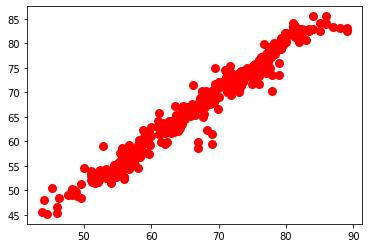

In [ ]:
plt.scatter(y_test,y_pred,color='red', linewidth=3)
plt.show

In [ ]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred_R = ridgeReg.predict(X_test)

In [ ]:
def predRidge(Year, Status, Adult_Mortality, Infant_deaths, Alcohol, Expenditure, Hepatitis_b, Measles, BMI, 
            Under_five_deaths, Polio, Total_expenditure, Diphtheria, HIV_AIDS, GDP, Population,
             Thinness_19_years, Thinness_9_years, Income_Composition, Schooling):
    x=[[Year, Status, Adult_Mortality, Infant_deaths, Alcohol, Expenditure, Hepatitis_b, Measles, BMI, 
            Under_five_deaths, Polio, Total_expenditure, Diphtheria, HIV_AIDS, GDP, Population,
             Thinness_19_years, Thinness_9_years, Income_Composition, Schooling]]

    y=ridgeReg.predict(x)
    
    
    return y[0]
    

In [ ]:
predRidge(2015, 0, 263, 62, 0.01, 71.27962362, 65, 1154, 19.1, 83, 6, 8.16, 65, 0.1, 584.25921, 33736494, 17.2, 17.3, 0.479, 10.1)

62.00696057172452

In [ ]:
predRidge(2013,0, 268, 66, 0.01, 73.21924272, 64, 430, 18.1, 89, 62, 8.13, 64, 0.1, 631.744976,31731688,17.7,17.7,0.47, 9.9)

63.40647713634798

In [ ]:
predRidge(2008, 1, 76, 0,12, 8329.731655, 83, 448, 54.2, 0, 83, 1.6, 83, 0.1, 51386.37665, 8321496, 1.7, 1.9, 0.864, 15.1)


78.72974007758908

In [ ]:
ridgeReg.score(X_test,y_test)

0.806962946243543

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_R))
print('MSE:', metrics.mean_squared_error(y_test, pred_R))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_R)))

MAE: 3.000255301531282
MSE: 16.7393155100462
RMSE: 4.091370859509829


<function matplotlib.pyplot.show>

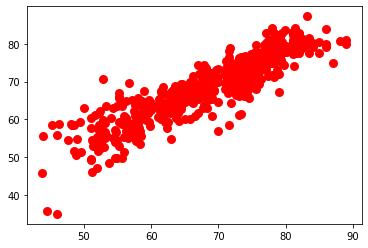

In [ ]:
plt.scatter(y_test,pred_R,color='red', linewidth=3)
plt.show

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

pred_L = linear_model.predict(X_test)

In [ ]:
def predLinear(Year, Status, Adult_Mortality, Infant_deaths, Alcohol, Expenditure, Hepatitis_b, Measles, BMI, 
            Under_five_deaths, Polio, Total_expenditure, Diphtheria, HIV_AIDS, GDP, Population,
             Thinness_19_years, Thinness_9_years, Income_Composition, Schooling):
    x=[[Year, Status, Adult_Mortality, Infant_deaths, Alcohol, Expenditure, Hepatitis_b, Measles, BMI, 
            Under_five_deaths, Polio, Total_expenditure, Diphtheria, HIV_AIDS, GDP, Population,
             Thinness_19_years, Thinness_9_years, Income_Composition, Schooling]]

    y=linear_model.predict(x)
    
    
    return y[0]

In [ ]:
predLinear(2015, 0, 263, 62, 0.01, 71.27962362, 65, 1154, 19.1, 83, 6, 8.16, 65, 0.1, 584.25921, 33736494, 17.2, 17.3, 0.479, 10.1)

62.31086992972704

In [ ]:
predLinear(2013,0, 268, 66, 0.01, 73.21924272, 64, 430, 18.1, 89, 62, 8.13, 64, 0.1, 631.744976,31731688,17.7,17.7,0.47, 9.9)

63.482137063529684

In [ ]:
predLinear(2008, 1, 76, 0,12, 8329.731655, 83, 448, 54.2, 0, 83, 1.6, 83, 0.1, 51386.37665, 8321496, 1.7, 1.9, 0.864, 15.1)


79.00604045536355

In [ ]:
linear_model.score(X_test,y_test)

0.8185741128299237

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_L))
print('MSE:', metrics.mean_squared_error(y_test, pred_L))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_L)))

MAE: 2.9100736323493916
MSE: 15.732446739792648
RMSE: 3.9664148471626928


<function matplotlib.pyplot.show>

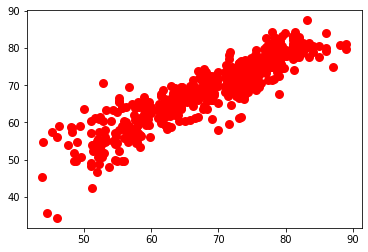

In [ ]:
plt.scatter(y_test,pred_L,color='red', linewidth=3)
plt.show